In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import StrMethodFormatter

# File to Load (Remember to Change These)
covid = "covid-clinical-trial_data_cleandata.csv"

# Read Purchasing File and store into Pandas data frame
covid_df = pd.read_csv(covid)
covid_df.head()

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Gender,Age,Phases,Enrollment,Study Type,URL
0,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Interventional,https://ClinicalTrials.gov/show/NCT04425538
1,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Interventional,https://ClinicalTrials.gov/show/NCT04452435
2,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Interventional,https://ClinicalTrials.gov/show/NCT04445272
3,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,All,"18 Years and older (Adult, Older Adult)",NaN,115,Observational,https://ClinicalTrials.gov/show/NCT04355741
4,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Interventional,https://ClinicalTrials.gov/show/NCT04578158


In [2]:
covid_df.shape

(1123, 13)

In [3]:
covid_df.ndim

2

In [4]:
# Identify incomplete rows
covid_df.count()

NCT Number       1123
Title            1123
Acronym           398
Status           1123
Study Results    1123
Conditions       1123
Interventions     932
Gender           1116
Age              1123
Phases            511
Enrollment       1123
Study Type       1123
URL              1123
dtype: int64

In [5]:
# Count how many Studies have occured within each phase
phases_counts = covid_df["Phases"].value_counts()
phases_counts.head()

Not Applicable    239
Phase 2           120
Phase 3            84
Phase 1            43
Phase 4            25
Name: Phases, dtype: int64

In [6]:
#Arrange variable
phases= len(covid_df['Phases'].unique())

#set in DF
phases_df = pd.DataFrame({"all phases": [len(covid_df.Phases.unique())]})
phases_df

,all phases
0,6


In [7]:
#remove Not applicabe 

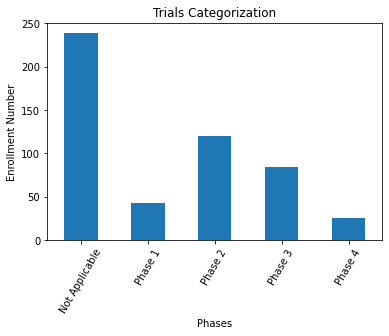

In [18]:
# Generate a bar plot showing the total number of Enrollment for all samples n using Pandas.
data_points = covid_df.groupby('Phases').count()['Enrollment']
panda_bar = pd.DataFrame(data_points)
#plot bar
also = panda_bar.plot.bar(legend=False,rot=60)
also
plt.ylabel("Enrollment Number")
plt.title("Trials Categorization")
plt.savefig('barplot1')


In [45]:
panda_bar.head()

,Enrollment
Phases,
Not Applicable,239
Phase 1,43
Phase 2,120
Phase 3,84
Phase 4,25


In [46]:
#generate pie chart

# Generate a pie plot showing the distribution of female versus male mice using Pandas
#visualiza study type

bystudytype = covid_df.groupby("Study Type").count()
bystudytype

,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Gender,Age,Phases,Enrollment,URL
Study Type,,,,,,,,,,,,
Interventional,511,511,175,511,511,511,511,511,511,511,511,511
Observational,612,612,223,612,612,612,421,605,612,0,612,612


In [47]:
labels = [covid_df['Study Type'].unique()]
newrecord = list(bystudytype.index)
newrecord

['Interventional', 'Observational']

In [48]:
sizes = [bystudytype["NCT Number"]]
sizes

[Study Type
 Interventional    511
 Observational     612
 Name: NCT Number, dtype: int64]

In [50]:
study_type_df = pd.DataFrame(covid_df.groupby(["Study Type"]).count()).reset_index()
study_type_df.head()

,Study Type,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Gender,Age,Phases,Enrollment,URL
0,Interventional,511,511,175,511,511,511,511,511,511,511,511,511
1,Observational,612,612,223,612,612,612,421,605,612,0,612,612


In [51]:
#Adjust  dataframe down to two columns
study_type_df = study_type_df[["Study Type","NCT Number"]]
study_type_df.head()

,Study Type,NCT Number
0,Interventional,511
1,Observational,612


Text(0, 0.5, '')

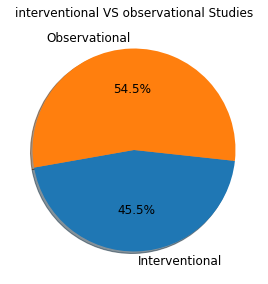

In [52]:
# Generate a pie plot showing the study types using pandas
plt.figure(figsize=(10,7))
ax1 = plt.subplot(121, aspect="equal")
study_type_df.plot(kind="pie", y = "NCT Number", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=study_type_df["Study Type"], legend = False, fontsize=12)

plt.title("interventional VS observational Studies")
plt.xlabel("")
plt.ylabel("")